In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import sklearn

In [20]:
#INPUT DATA

data = pd.read_csv('chronic_kidney_disease.csv') 
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class,packed cell volume
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,7800,5.2,yes,yes,no,good,no,no,ckd,44
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,6000,NaN,no,no,no,good,no,no,ckd,38
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500,NaN,no,yes,no,poor,no,yes,ckd,31
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,32
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300,4.6,no,no,no,good,no,no,ckd,35


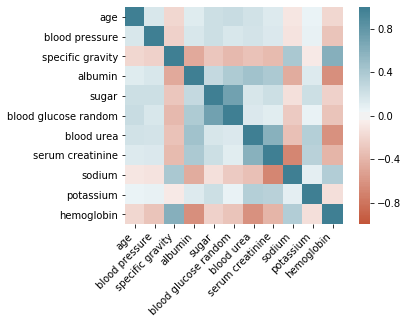

In [21]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=400),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


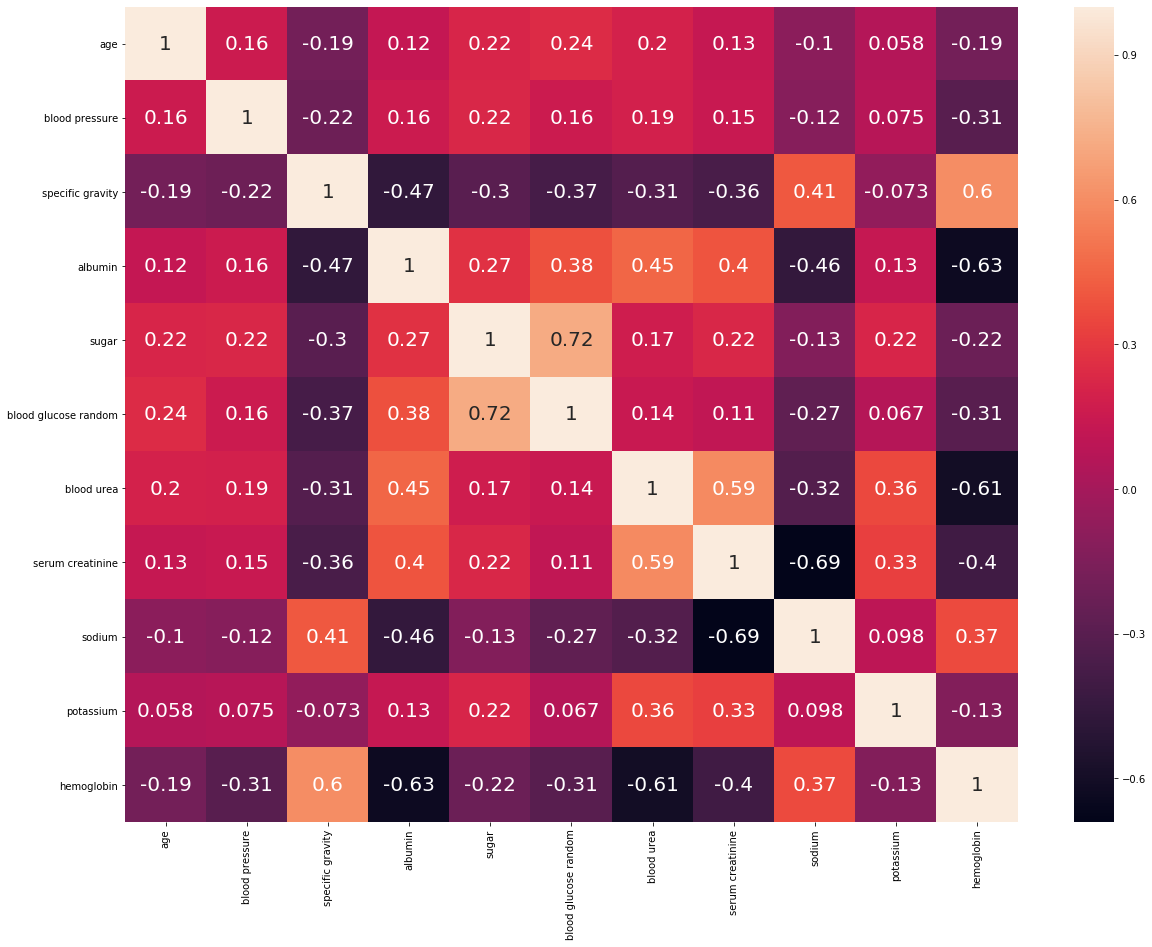

In [22]:
from pandas import DataFrame
import seaborn as sn

df = DataFrame(data,columns=['age','blood pressure','specific gravity','albumin','sugar','blood glucose random',
                             'blood urea','serum creatinine','sodium','potassium','hemoglobin'])
fig, ax = plt.subplots(figsize=(20,15),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 20},ax=ax)

In [23]:
print(data.isna().sum()/400 * 100)

# Since "red blood cells","sodium","potassium","white blood cell count" and "red blood cell count" will be droped becaus of the 
# high NAN rate.

Data=data.drop(columns=["red blood cells","sodium","potassium","white blood cell count" , "red blood cell count"])

age                         2.25
blood pressure              3.00
specific gravity           11.75
albumin                    11.50
sugar                      12.25
red blood cells            38.00
pus cell                   16.25
pus cell clumps             1.00
bacteria                    1.00
blood glucose random       11.00
blood urea                  4.75
serum creatinine            4.25
sodium                     21.75
potassium                  22.00
hemoglobin                 13.00
white blood cell count     26.25
red blood cell count       32.50
hypertension                0.50
diabetes mellitus           0.50
coronary artery disease     0.50
appetite                    0.25
pedal edema                 0.25
anemia                      0.25
class                       0.00
packed cell volume         17.50
dtype: float64


In [24]:
Data.head()


,age,blood pressure,specific gravity,albumin,sugar,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class,packed cell volume
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,yes,yes,no,good,no,no,ckd,44
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,18.0,0.8,11.3,no,no,no,good,no,no,ckd,38
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,1.8,9.6,no,yes,no,poor,no,yes,ckd,31
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,yes,no,no,poor,yes,yes,ckd,32
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,no,no,no,good,no,no,ckd,35


In [25]:
print(Data.isna().sum()/400 * 100)

age                         2.25
blood pressure              3.00
specific gravity           11.75
albumin                    11.50
sugar                      12.25
pus cell                   16.25
pus cell clumps             1.00
bacteria                    1.00
blood glucose random       11.00
blood urea                  4.75
serum creatinine            4.25
hemoglobin                 13.00
hypertension                0.50
diabetes mellitus           0.50
coronary artery disease     0.50
appetite                    0.25
pedal edema                 0.25
anemia                      0.25
class                       0.00
packed cell volume         17.50
dtype: float64


In [26]:
Data=Data.replace('\t','',regex=True) #remove \t from data
Data=Data.replace('\n','',regex=True) #remove \t from data

Data=Data.replace('notckd',0,regex=True) #replace notckd with 0
Data=Data.replace('ckd',1,regex=True)    #replace ckd with 1

Data=Data.replace('abnormal',1,regex=True)    #replace abnormal with 1
Data=Data.replace('normal',0,regex=True)     #replace normal with 0

Data=Data.replace('notpresent',0,regex=True) #replace notpresent with 0
Data=Data.replace('present',1,regex=True)    #replace present with 1

Data=Data.replace('yes',1,regex=True)    #replace yes with 0
Data=Data.replace('no',0,regex=True)     #replace no with 1

Data=Data.replace('good',1,regex=True)    #replace good with 1
Data=Data.replace('poor',0,regex=True)     #replace poor with 0

Data.head()

,age,blood pressure,specific gravity,albumin,sugar,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class,packed cell volume
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1,44
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,NaN,18.0,0.8,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1,38
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,423.0,53.0,1.8,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1,31
3,48.0,70.0,1.005,4.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1,32
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1,35


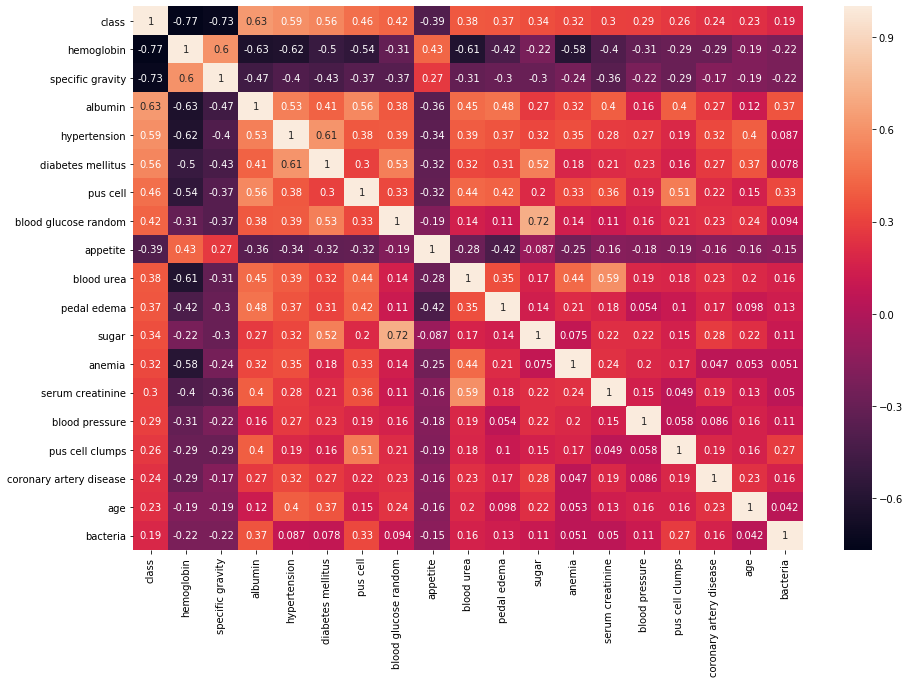

In [27]:
from pandas import DataFrame
import seaborn as sn
t=['bacteria', 'age', 'coronary artery disease', 'pus cell clumps',
       'blood pressure', 'serum creatinine', 'anemia', 'sugar', 'pedal edema',
       'blood urea', 'appetite', 'blood glucose random', 'pus cell',
       'diabetes mellitus', 'hypertension', 'albumin', 'specific gravity',
       'hemoglobin',"packed cell volume", 'class']
t=t[::-1]
df = DataFrame(Data[t],columns=t)
#['age','blood pressure','specific gravity','albumin','sugar','blood glucose random',
#                             'blood urea','serum creatinine','hemoglobin','hypertension','pus cell','class']
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 10},ax=ax)

In [28]:
Data

,age,blood pressure,specific gravity,albumin,sugar,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class,packed cell volume
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1,44
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,NaN,18.0,0.8,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1,38
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,423.0,53.0,1.8,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1,31
3,48.0,70.0,1.005,4.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1,32
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,140.0,49.0,0.5,15.7,0.0,0.0,0.0,1.0,0.0,0.0,0,47
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,75.0,31.0,1.2,16.5,0.0,0.0,0.0,1.0,0.0,0.0,0,54
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,100.0,26.0,0.6,15.8,0.0,0.0,0.0,1.0,0.0,0.0,0,49
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,114.0,50.0,1.0,14.2,0.0,0.0,0.0,1.0,0.0,0.0,0,51


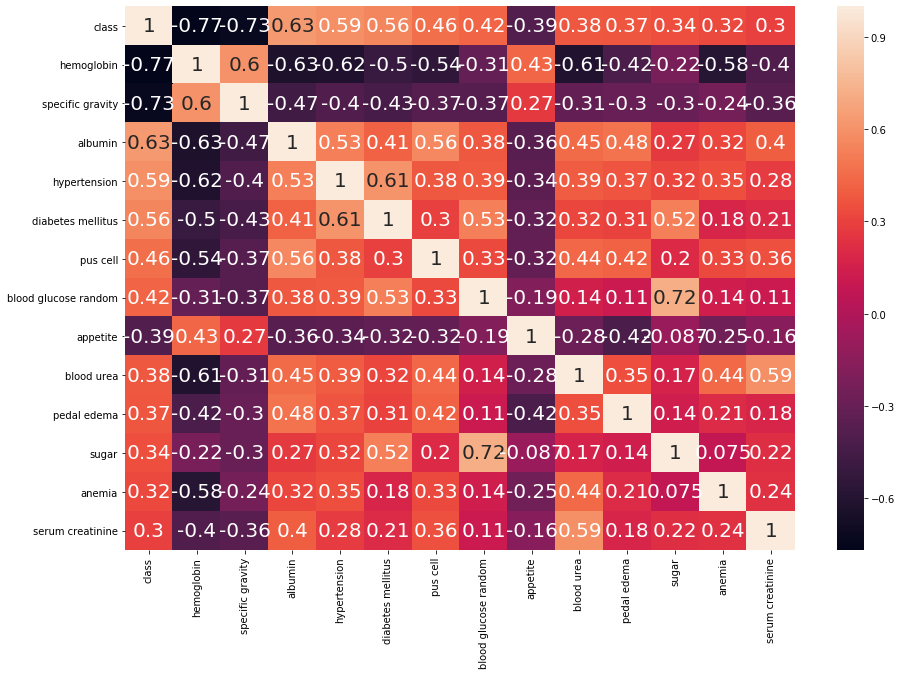

In [29]:
from pandas import DataFrame
import seaborn as sn
highCo=["class","hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
                             "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]
df = DataFrame(Data,columns=highCo)
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 20},ax=ax)


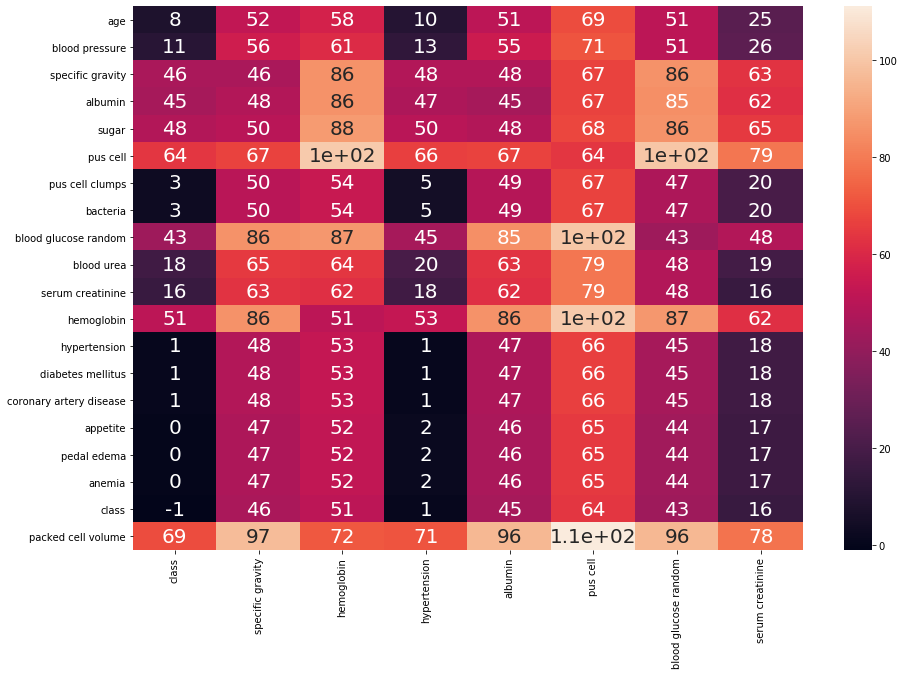

In [30]:
from pandas import DataFrame
import seaborn as sn

c=[]
cols=[]
for i in Data:
    for j in Data:
        subdata = Data.loc[:,[i,j]]
        subData=subdata.dropna(subset=[i,j])
        c+=[400-1-len(subData)]
    cols+=[i]
a=np.array(c)
colsV=np.array(cols)
b=a.reshape(20,20) 
d=dict()
for i in range (20):
    d[cols[i]]=b[i]

df = DataFrame(d,index=cols,columns=['class','specific gravity', 'hemoglobin','hypertension', 'albumin', 'pus cell','blood glucose random','serum creatinine'])

fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
sn.heatmap(df, annot=True,annot_kws={"size": 20},ax=ax)


In [31]:
#Y is the data metrix 
#R contains not na values
Y=Data
R=Data.isna()
R=R*1
R=R.replace(1,2,regex=True) 
R=R.replace(0,1,regex=True) 
R=R.replace(2,0,regex=True) 
cols=[]

p=R.sum(axis=1)
dp=dict()
for i in range (len(p)):
    if p[i] !=20:
        if p[i] not in dp:
            dp[p[i]]=[]
        dp[p[i]]+=[i]


for i in R.columns:cols+=[i]
TrainingData=Data.dropna(subset=cols)


toPredict=dict()
for i in range (1,8):
    toPredict[i]=dict()
        
for row in R.head(400).itertuples():
    index=row[0]
    p=[]
    for i in range (1,len(row)):
        if (row[i]==0): p+=[str(i)]
            
    if len(p)>0:
        n=" ".join(p)
        if " ".join(p) not in toPredict[len(p)]:
            toPredict[len(p)][n]=[]
        toPredict[len(p)][n]+=[index]

for  i in toPredict:
    print(i,"=========",len(toPredict[i]))


1 ========= 8
2 ========= 9
3 ========= 15
4 ========= 8
5 ========= 7
6 ========= 5
7 ========= 1


In [32]:
def models(X_train,Y_train):
    
    
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.preprocessing import PolynomialFeatures
    
    polynomial_features=PolynomialFeatures(degree=4, interaction_only=False, include_bias=True, order='C')
    x_poly = polynomial_features.fit_transform(X_train)

    model = LinearRegression()
    model.fit(x_poly, Y_train)
    
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(Y_train,y_poly_pred))
    r2 = r2_score(Y_train,y_poly_pred)
#     print(rmse)
#     print(r2)

    #print the accuracy of each model
    print("[0] Polynomial Features Training Accuracy: ",r2)
    
    return polynomial_features

In [33]:
# print(cols)
q=cols[8]
X=TrainingData.loc[:, TrainingData.columns != q]
Y=TrainingData.loc[:, [q] ]

# Train and test set 80% : 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
Y_train = np.array(np.ravel(Y_train)).astype(int)

MODELs=models(X_train,Y_train)



[0] Polynomial Features Training Accuracy:  1.0


In [34]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-5*iqr
    fence_high = q3+5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [52]:
DataSet=np.array(Data)
Data.dtypes

age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
pus cell                   float64
pus cell clumps            float64
bacteria                   float64
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
hemoglobin                 float64
hypertension               float64
diabetes mellitus          float64
coronary artery disease    float64
appetite                   float64
pedal edema                float64
anemia                     float64
class                        int64
packed cell volume          object
dtype: object

In [55]:
p=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine'  ]
print(len(Data))
D0=remove_outlier(data, p[0])
print(len(D0),p[0],len(subdata)-len(D0))
D1=remove_outlier(D0, p[1])
print(len(D1),p[1],len(D0)-len(D1))
D2=remove_outlier(D1, p[2])
print(len(D2),p[2],len(D1)-len(D2))
D3=remove_outlier(D2, p[3])
print(len(D3),p[3],len(D2)-len(D3))

D5=remove_outlier(D3, p[5])
print(len(D5),p[5],len(D3)-len(D5))
D6=remove_outlier(D5, p[6])
print(len(D6),p[6],len(D5)-len(D6))

D6.describe()

400
353 specific gravity 47
313 hemoglobin 40
311 albumin 2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


TypeError: can't multiply sequence by non-int of type 'float'

In [47]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=400)
filledData=imputer.fit_transform(Data)


ValueError: could not convert string to float: 

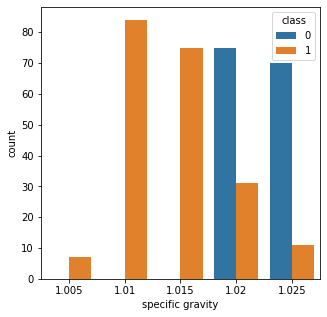

In [43]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(Data['specific gravity'],hue=Data["class"])

In [ ]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(Data['hemoglobin'],hue=Data["class"])

In [ ]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(Data['albumin'],hue=Data["class"])

In [ ]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(Data['hypertension'],hue=Data["class"])

In [ ]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(Data["diabetes mellitus"],hue=Data["class"])

In [ ]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(Data["pus cell"],hue=Data["class"])

In [ ]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(Data['blood glucose random'],hue=Data["class"])

In [ ]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(Data['appetite'],hue=Data["class"])

In [ ]:
from pandas import DataFrame
import seaborn as sn
highCo=["class","hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
                             "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]
df = DataFrame(Data,columns=highCo)
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 15},ax=ax)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="hemoglobin"
Y="albumin"


fig, ax = plt.subplots()

ax.scatter(np.array(Data[X]), np.array(Data[Y]), c=np.array(Data["class"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="hemoglobin"
Y="specific gravity"

fig, ax = plt.subplots()

ax.scatter(np.array(Data[X]), np.array(Data[Y]), c=np.array(Data["class"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="hemoglobin"
Y="pus cell"

fig, ax = plt.subplots()

ax.scatter(np.array(Data[X]), np.array(Data[Y]), c=np.array(Data["class"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="hemoglobin"
Y="blood urea"

fig, ax = plt.subplots()

ax.scatter(np.array(Data[X]), np.array(Data[Y]), c=np.array(Data["class"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="hemoglobin"
Y="age"

fig, ax = plt.subplots()

ax.scatter(np.array(Data[X]), np.array(Data[Y]), c=np.array(Data["class"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);
plt.show()

In [ ]:
s=abs(Data.corr()['class'])
p=s.sort_values(ascending=True)
print(p.index)

In [ ]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(Data['serum creatinine'],hue=Data["class"])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="specific gravity"
Y="albumin"


fig, ax = plt.subplots()
subData=Data.dropna(subset=[X,Y])


scatter =ax.scatter(np.array(subData[X]), np.array(subData[Y]), c=np.array(subData["class"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);



# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")


plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="serum creatinine"
Y="hemoglobin"


fig, ax = plt.subplots()
subData=Data.dropna(subset=[X,Y])


scatter =ax.scatter(np.array(subData[X]), np.array(subData[Y]), c=np.array(subData["class"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);



# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")


plt.show()


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="serum creatinine"
Y="blood urea"


fig, ax = plt.subplots()

ax.scatter(np.array(Data[X]), np.array(Data[Y]), c=np.array(Data["class"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);
plt.show()

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="serum creatinine"
Y="packed cell volume"


fig, ax = plt.subplots()

ax.scatter(np.array(Data[X]), np.array(Data[Y]), c=np.array(Data["class"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);
plt.show()

In [ ]:
Data.corr()

In [ ]:
for i in Data:
    print(i)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="hypertension"
Y="diabetes mellitus"


fig, ax = plt.subplots()
subData=Data.dropna(subset=[X,Y])


scatter =ax.scatter(np.array(subData[X]), np.array(subData[Y]), c=np.array(subData["class"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);



# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center right", title="Classes")


plt.show()
